# Assignment #5 - Deep Learning

### <font color="red"> DUE: Apr 23 (Tuesday) 11:00 pm </font>  

<font color="blue"> Sumedh Joglekar </font>

# I. Overview

The main objective of this assignment is to implemnt deep learning algorithm with the help of Tensorflow or Keras. In this assignment we will be implementing different neural network structures and will be doing experiments with the same. 

I am going to use keras machine learning library in order to implement deep learning models and will be checking the accuracies of these models with different set of paramters.

# II. Data


## 1.  Introduction of data for classification & source

- The dataset contains the historical data on avocado prices and sales volume in multiple US markets from 2015 to 2018.
- The Average Price of avocados in the table reflects a per unit cost, even when multiple avocados units are sold in bags.
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados

### Data Observation:

__Below is the description of the various variables present in the data :__

1. Date - The date of the incident
2. AveragePrice - the average price of a avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the incident
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold :- Small Hass
8. 4225 - Total number of avocados with PLU 4225 sold :- Large Hass
9. 4770 - Total number of avocados with PLU 4770 sold :- Extra Large Hass

### Source :

https://www.kaggle.com/neuromusic/avocado-prices

## 1. Reading the data

Here I am reading the data from CSV file with the use of pandas read_csv function.

P.S. :- Place the file path in read_csv function while running the code so that csv file will get read.

In [1]:
### Importing the required libraries ####
import seaborn as sns
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from copy import deepcopy as copy 
#########

#########
print("Reading the file :- ")
#print(os.listdir("D:\sum\Its Study Time\Academic\M.S\Spring_2019\Machine Learning\Assignment 3"))
###################
data = pd.read_csv("avocado.csv", encoding='utf-8')# Place the file location here.
data.head(10)

Reading the file :- 


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


## 2. Preprocessing of the data

In order to do the pre-processing task, I have followed below steps:-
1. Check for the null values, if any null data is present either remove the entries(if entries are less in number) or replace the null value with the mean of that category. If any of this method is not suitable then think for other pre-processing tasks.
2. Eliminate irrelevant columns so that the visualization will be easier.
3. Rename the column names of PLU's with the bag size so that data interpretation can be more convenient.
4. Separated out the 'date' column into 'year' as it will be easy to visualize the data distribution over different years.
5. Initial observation, it was found that there is an overlapping of the data in the given dataset and hence removed the overlapping entries from the dataset.

In [2]:
# Pre Processing the data.. Splitting the column Date and taking out only year from it ########
################# 1. Checking for thr null Values ################
print(data.isnull().sum())
################# 2. Dropping unwanted column Unnamed ################
data.rename( columns={'Unnamed: 0':'new column name'}, inplace=True )
data = data.drop('new column name', axis=1)
################# 3. Renaming the columns so that visualization will be more convinient ################
data = data.rename(index=str, columns={"4046" : "Small_Hass", "4225" : "Large_Hass", "4770" : "XLarge_Hass"})
data.head()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


,Date,AveragePrice,Total Volume,Small_Hass,Large_Hass,XLarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
########### 4.Separating out Year from  Date column ########### 
data
new_data = data["Date"].str.split("-", n = 2, expand = True) 
data["Year"] = new_data[0]
data.drop(columns=["Date"], inplace = True)
data.head()
#new_data

,AveragePrice,Total Volume,Small_Hass,Large_Hass,XLarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015


### Note :-
After observing the data, it is found that there is overlapping between data, e.g there is a data of California as well as SanFrancisco. We need to remove the overlapping data to have correct visualization. Hence removing overlapping data by dropping certain rows.

In [4]:
############ 5. Removing the overlapping data. #############
regionsToDrop = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 
                   'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
data = data[~data.region.isin(regionsToDrop)] # Taking compliment of data not present in regionsToDrop
data.head()

,AveragePrice,Total Volume,Small_Hass,Large_Hass,XLarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015


## 3. Visualization of the data


Taking 5 cities and checking the pattern in which the prices are increased. To do that plotting the line graph for all years with average price.

Top 5 Contries:- 
----------------
HartfordSpringfield
SanFrancisco
Philadelphia
Sacramento
Charlotte


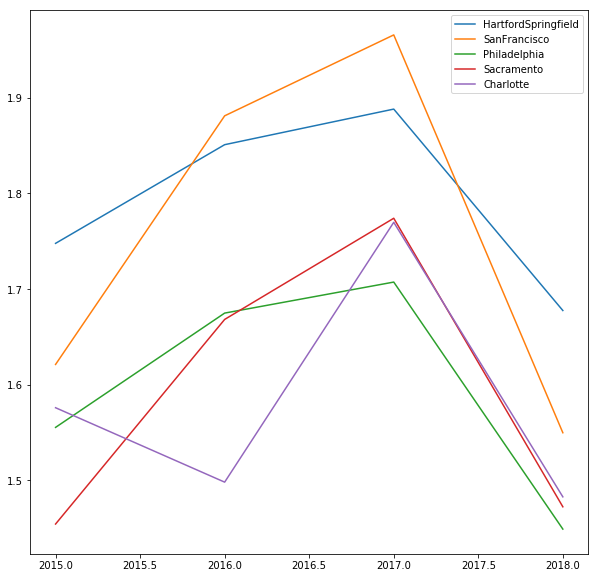

In [5]:
############ Average Price of Avocado According to the Year for top 5 highest average prices ##########
area_list=list(data.region.unique())
unique_years = list(data.year.unique())
area_averageprice_ratio=[]
for i in area_list:
    x=data[data['region']==i]
    area_averageprice_rate=sum(x['AveragePrice'])/len(x)
    area_averageprice_ratio.append(area_averageprice_rate)
#area_averageprice_ratio = sorted(area_averageprice_ratio,reverse=True)
#print(area_averageprice_ratio)
df=pd.DataFrame({'area_list':area_list,'area_averageprice_ratio':area_averageprice_ratio})
new_index=df['area_averageprice_ratio'].sort_values(ascending=False).index.values
sorted_data=df.reindex(new_index)
#print(sorted_data.area_list[int(sorted_data.index[0])])
plt.figure(figsize=(10,10))
test1=[]
print("Top 5 Contries:- ")
print("----------------")
for i in range(0,5):
    avg_column_cali= data[data["region"]==sorted_data.area_list[int(sorted_data.index[i])]]
    print(sorted_data.area_list[int(sorted_data.index[i])])
    #avg_column_cali = data[data["region"]==area_list[i]]                              
    #print(avg_column_cali)
    avg_per_year_cali = avg_column_cali.groupby('year').aggregate('mean')
    #data.year
    #print(avg_per_year_cali.AveragePrice)
    test1.append(sorted_data.area_list[sorted_data.index[i]])
    plt.plot(unique_years,avg_per_year_cali.AveragePrice)
    plt.legend(sorted_data.area_list[int(sorted_data.index[i])])
plt.legend(test1)
plt.show()

### Observation:-

1. Above Graph shows average prices during each year. 
(Here I have taken the graph of 5 cities whose average price cost of avocado was maximum)
2. From the above graph, it can be inferred that the avocado prices were increased substantially in the year 2017.
3. This price rise was mainly due to the low supply and high demand. 
(Source:- https://money.cnn.com/2017/09/09/news/economy/avocado-prices-soar/index.html)
4. Again in 2018, the prices of Avocado dropped below.


Text(0.5, 1.0, 'Average Price/States')

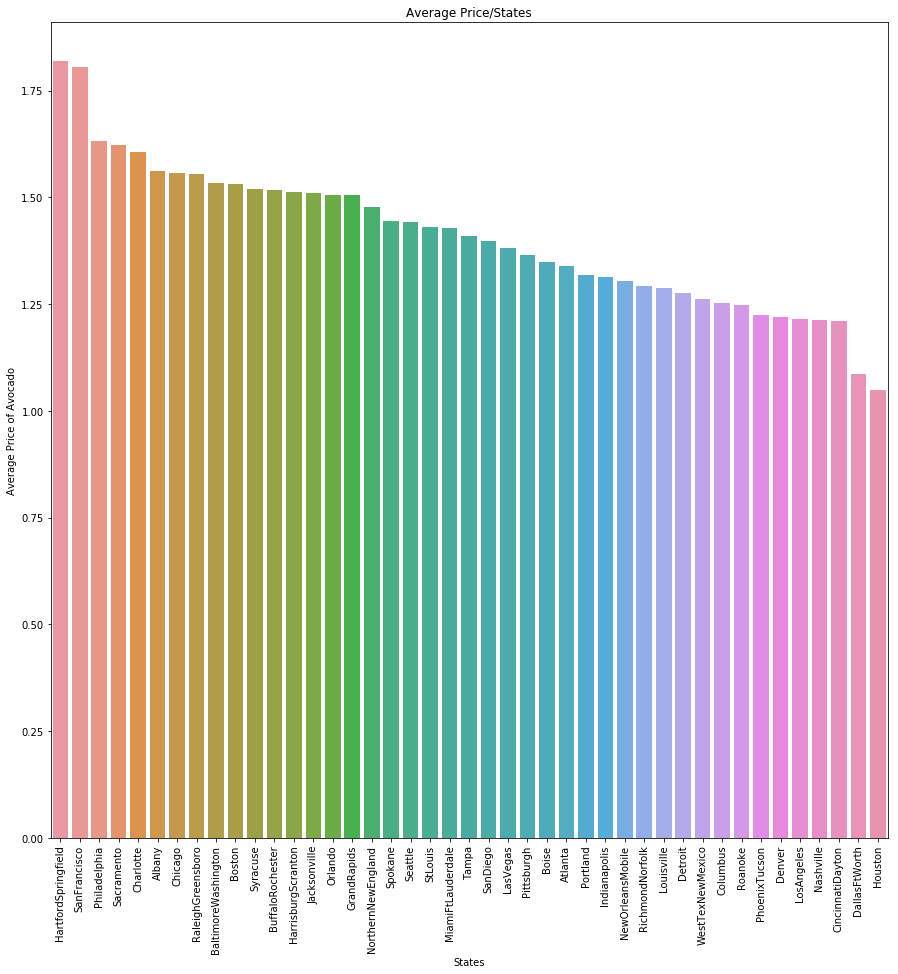

In [6]:
######## Lets Analyze the distribution of Avergae Price over all states #############
plt.figure(figsize=(15,15))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_averageprice_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('Average Price of Avocado')
plt.title('Average Price/States')

- Above graph show the distribution of average prices of all states.
- Hartford-Springfield, SanFrancisco, Philadelphia, Sacramento, Charlotte are the top five cities in which average price was higher(considering all 4 years) and the average price of Avocado was minimum in Houston.

Now let's check which type of avocado was more expensive and might be the cause for an increase in average price. The below-plotted bar graph will give more information on the same.

Years :-  [2015, 2016, 2017, 2018]
Conventional Avocados Average Price :-  [1.0821109123434725, 1.1050715563506255, 1.2963624396665214, 1.1306007751937983]
Organic Avocados Average Price :-  [1.6708411633109654, 1.5707558139534832, 1.7429995608256486, 1.568488372093023]


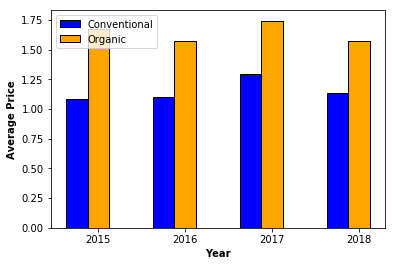

In [7]:
################### Plotting bar graph to find categorial distribution of average price ###################

######### Storing data of each year in different lists ##########
data_15=data[data.year==2015]
data_16=data[data.year==2016]
data_17=data[data.year==2017]
data_18=data[data.year==2018]
years = list(data.year.unique())
print("Years :- ",years)
data_15_con = data_15[data_15.type =='conventional'].AveragePrice.mean()
conventional_data = [float(data_15[data_15.type =='conventional'].AveragePrice.mean()),float(data_16[data_16.type =='conventional'].AveragePrice.mean()),float(data_17[data_17.type =='conventional'].AveragePrice.mean()),float(data_18[data_18.type =='conventional'].AveragePrice.mean())]
print("Conventional Avocados Average Price :- ",conventional_data)
organic_data = [float(data_15[data_15.type =='organic'].AveragePrice.mean()),float(data_16[data_16.type =='organic'].AveragePrice.mean()),float(data_17[data_17.type =='organic'].AveragePrice.mean()),float(data_18[data_18.type =='organic'].AveragePrice.mean())]
print("Organic Avocados Average Price :- ",organic_data)
###########################################
barWidth = 0.25
r1 = np.arange(len(conventional_data))
r2 = [x + barWidth for x in r1]
plt.bar(r1, conventional_data, color='blue', width=barWidth, edgecolor='black', label='Conventional')
plt.bar(r2, organic_data, color='orange', width=barWidth, edgecolor='black', label='Organic')
###
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(conventional_data))], years)
plt.ylabel('Average Price', fontweight='bold')
###
plt.legend()
plt.show()

### Observation:-

1. This bar graph shows clearly that there was an increase in the price of avocado in both categories(Conventional and Organic) in 2017 and this was maximum as compared to any other year.

2. Above comparison between the average price of conventional and organic avocado also shows that the average price of organic avocados was always higher than the conventional and price difference between organic and conventional were maximum in 2015.


To check the effect of price rise on the consumption of the avocado, plotting total volume consumed 

Most consumed cities :-
---------------------
LosAngeles
DallasFtWorth
Houston
PhoenixTucson
WestTexNewMexico


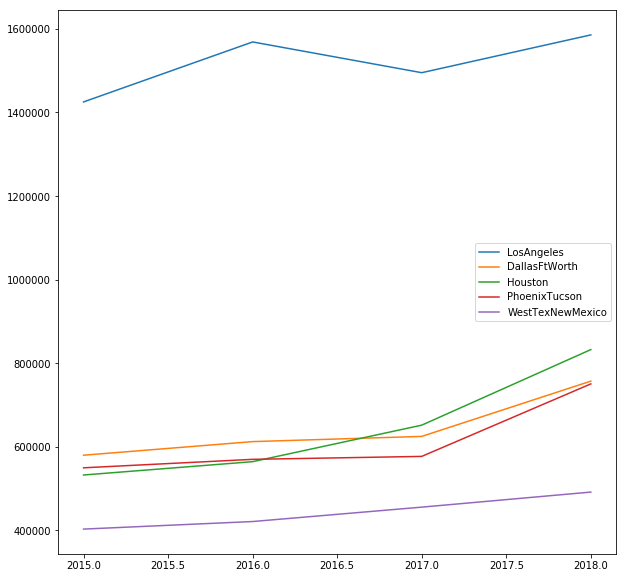

In [8]:
####### Distribution of total consumption of avocado in 5 states #############
data = data.rename(index=str, columns={"Total Volume" : "TotalVolume"})
area_list=list(data.region.unique())
unique_years = list(data.year.unique())
area_averageprice_ratio=[]
for i in area_list:
    x=data[data['region']==i]
    area_averageprice_rate=sum(x['TotalVolume'])/len(x)
    area_averageprice_ratio.append(area_averageprice_rate)
#area_averageprice_ratio = sorted(area_averageprice_ratio,reverse=True)
#print(area_averageprice_ratio)
df=pd.DataFrame({'area_list':area_list,'area_average_volume_ratio':area_averageprice_ratio})
new_index=df['area_average_volume_ratio'].sort_values(ascending=False).index.values
sorted_data=df.reindex(new_index)
plt.figure(figsize=(10,10))
test = []
print("Most consumed cities :-")
print("---------------------")
#print(sorted_data.area_list[int(sorted_data.index[0])])
for i in range(0,5):
    avg_column_cali= data[data["region"]==sorted_data.area_list[int(sorted_data.index[i])]]
    print(sorted_data.area_list[int(sorted_data.index[i])])
    #avg_column_cali = data[data["region"]==area_list[i]]                              
    #print(avg_column_cali)
    avg_per_year_cali = avg_column_cali.groupby('year').aggregate('mean')
    #data.year
    #print(avg_per_year_cali.AveragePrice)
    #print(avg_per_year_cali.TotalVolume)
    test.append(sorted_data.area_list[sorted_data.index[i]])
    plt.plot(unique_years,avg_per_year_cali.TotalVolume)
#print(test)
plt.legend(test)
plt.show()

### Observation :-

From the above graph, it can be concluded that the total volume consumed were maximum in Los Angeles. Although we got the top city in which the consumption of avocado was maximum, plotting the distribution graph of volume consumed in each state to have more understanding about the distribution in each state.

Text(0.5, 1.0, 'Average Volume Consume States')

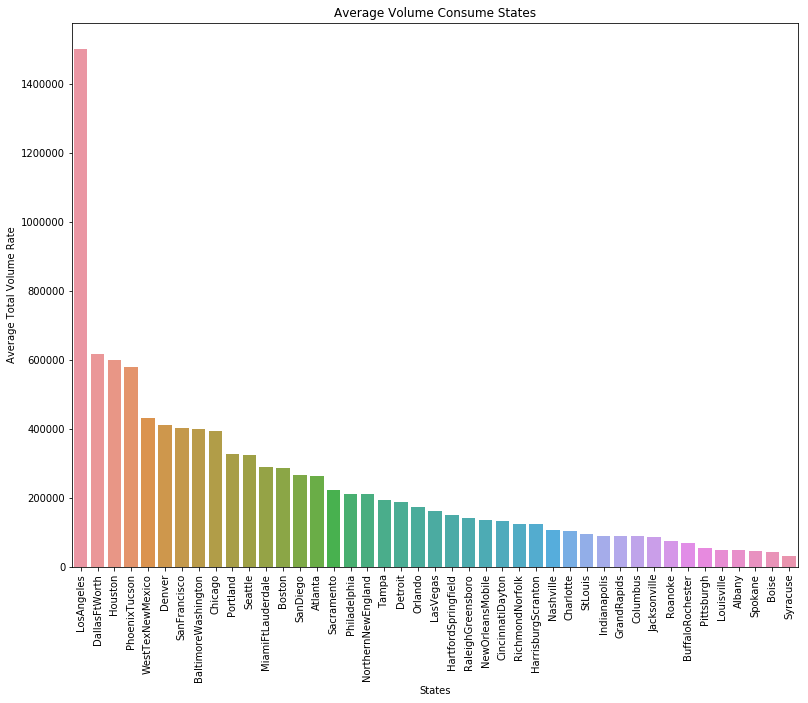

In [9]:
######## Lets Analyze the distribution of Avergae volume consumed over all states #############
plt.figure(figsize=(13,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_average_volume_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('Average Total Volume Rate')
plt.title('Average Volume Consume States')

### Observation :-

- Above Graph shows the distribution of the total volume over all states. From the above graph it can be concluded that the total volume consumed was very large in Los Angeles than any other states.
- Now let's analyze the overall volume distribution of Los Angeles in terms of 'Conventional' and 'Organic', to see which type of Avocados are getting sold more.

conventional    169
organic         152
Name: type, dtype: int64


Text(0.5, 1.0, 'Type of Distribution')

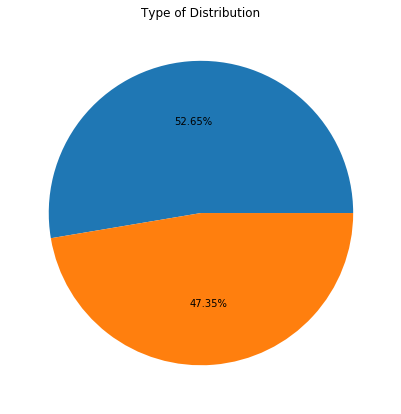

In [10]:
############### Plotting bar graph bar to see the categorial distribution in LosAngeles #################
data_LA = data[(data["region"]=="LosAngeles")& (data.AveragePrice<2)]
#print(data_LA)
print(data_LA.type.value_counts())
plt.figure(figsize=(7,7))
plt.pie(data_LA.type.value_counts(),autopct='%1.2f%%')
plt.title('Type of Distribution')

### Observation :-

- People in LosAngeles prefers conventional avocados over organic.

Now let's find the relation between different features of avocado using Heat Map.

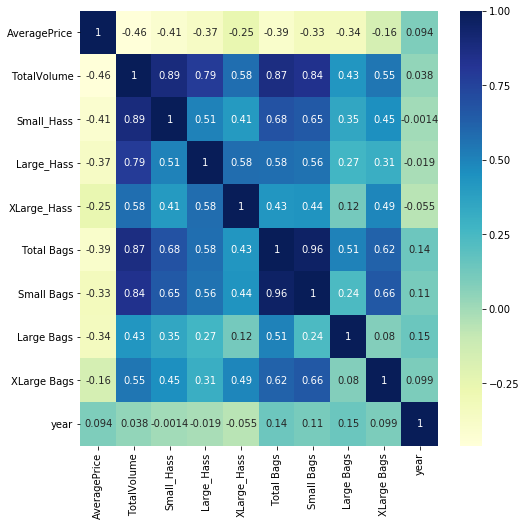

In [11]:
####### TO chek the relation between two features, plotting heatmap ############
heat_map=plt.subplots(figsize=(8,8))
heat_map = sns.heatmap(data.corr(),annot = True, cmap="YlGnBu")
plt.show()

### Observation :-

- Total Bags of Avocados sold were closely related more to small bags, XLarge bags, and Large bags respectively.
- Also, similar observation can be seen with respect to total volume consumed and small bags, XLarge bags and Large bags.
- Hence customers preferences can be concluded as :-  __small bags > XLarge bags > Large bags__

## 4. Preliminary Observation

From above all visualizations below things can be concluded:-

1. The average price of the Avocado was maximum in 2017. The prices were drastically increased from 2016 to 2017. In 2018 average prices of Avocado again dropped.
2. The average price was maximum in 'Hartford-Springfield' throughout the period and minimum in Houston.
3. It is also observed from the grouped bar graph that the average price of organic avocado was more than the conventional type avocado. This is true as the cost required for the manufacture of organic is more than the conventional and hence the average cost price of organic will be more than the conventional.
(Source:- https://www.foxnews.com/food-drink/10-reasons-organic-food-is-so-expensive)
4. From the Average volume ratio graph, it can be inferred that the average volume of avocado consumed by the customers is maximum in Los Angeles. Now in order check, whether the customer prefers organic or conventional avocado, I plotted the pie chart of the distribution of average volume consumed over avocado type for Los Angeles and found that customer prefers conventional avocado more than the organic avocados.
5. Possibly the reason why customer prefers conventional over organic may be the average price difference between these two types.
6. Customers prefer to buy small bags more than Xlarge and large bags.

## 5. Preprocessing of the data for the classification:-

1. Performing sampling to get the 12000 randomly from the whole dataset. In order to perform the classification, I am going to use the same sampled dataset.
2. Once the sampling is done, I will check for the outliers present in the data, in order to remove the same.
3. To check the presence of outliers, plotting boxplots with selected features.

(14000, 4)
Features considered for box-plot :- 
1 . AveragePrice
2 . TotalVolume
3 . Total Bags


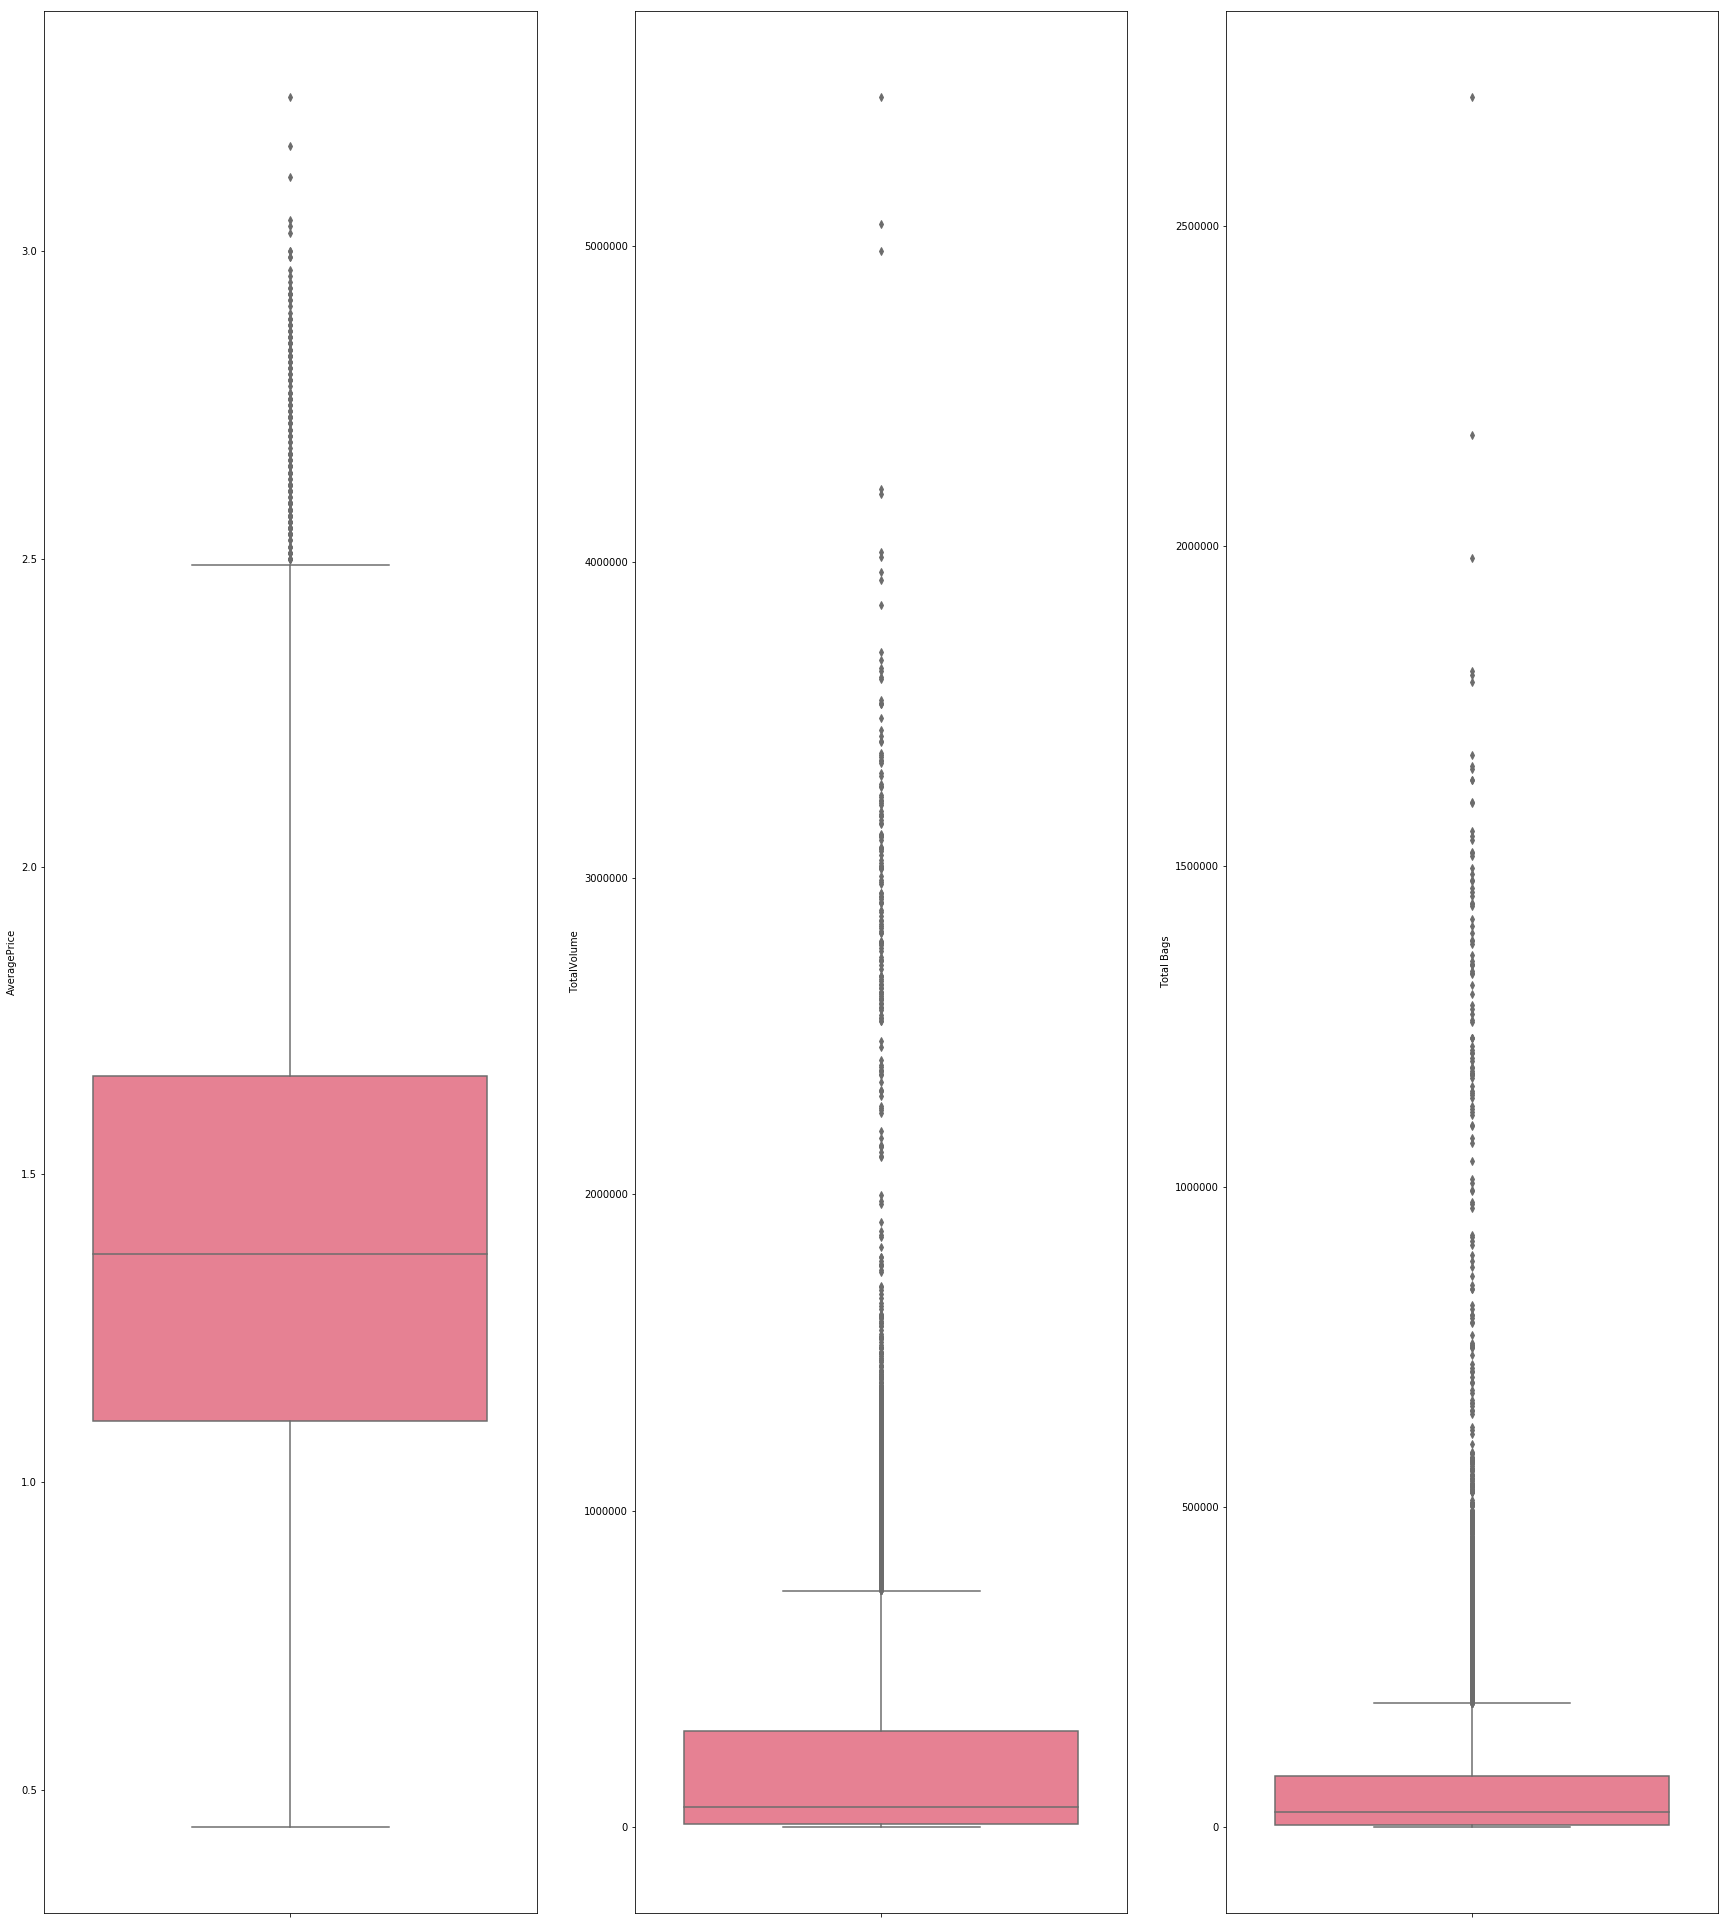

In [12]:
################# Sampling out 12000 data points and plotting box-plots on it ##################
data2 = data[['AveragePrice','TotalVolume','Total Bags','type']].copy()
data2 = data2.sample(14000)
print(data2.shape)
print("Features considered for box-plot :- ")
fig, axes =plt.subplots(1,3,figsize=(30,35))
for i in range (0,data2.shape[1]-1):
    #fig = plt.figure(figsize = (7, 7))
    print(i+1,".",data2.columns.values[i])
    sns.boxplot(y=str(data2.columns.values[i]),data=data2,ax=axes[i%3],palette = "husl")

In [13]:
######################### Function to remove outliers ##########################
def findOutliers(dataframe,column):
    #column = "total_rooms" 
    #housing[column].plot.box(figsize=(8,8))
    des = dataframe[column].describe()
    print("Description of :-",column,"\n --------------------------------")
    print(des)
    cummulative = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Quantile1 = des[cummulative['25']]
    Quantile3 = des[cummulative['75']]
    IQR = Quantile3-Quantile1
    lowerBound = Quantile1-1.5*IQR
    upperBound = Quantile3+1.5*IQR
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]
    print("-------------------Removing outliers -----------------")
    #remove the outliers from the dataframe
    outlier = dataframe[~dataframe[column].isin(data[column])]
    return outlier

def norm(df, feature_name):
    #print(feature_name)
    temp_df = data2.copy()
    maxValue = data2[feature_name].max()
    minValue = data2[feature_name].min()
    temp_df[feature_name] = (data2[feature_name] - minValue) / (maxValue - minValue)
    #print(temp_df)
    return temp_df

### Preliminary Observation :- 

- As there are outliers present in the data, we need to remove the same before proceeding with the classification. 
- The above-mentioned method performs the task of removing outliers by calculating quantile boundaries for each column.
- Next step will be to convert the categorical target variable 'type' into -1,1. This is performed so that the same can be used while calculating the weight parameter in case of pocket algorithm of classification.

In [14]:
data2['type'].replace(['conventional','organic'],[0,1],inplace=True)
print(data2.head())

       AveragePrice  TotalVolume  Total Bags  type
15016          1.35     10115.95     9748.70     1
1756           0.71   1089117.00    60883.78     0
15385          2.05     15794.46    11207.98     1
1802           0.98    208821.04    52968.31     0
2217           1.30    742672.03    74446.83     0


In [15]:
############# Removing the ouliers from population ######################
data2 = findOutliers(data2,"AveragePrice")
print(data2.shape)
############# Removing the ouliers from population ######################
data2 = findOutliers(data2,"TotalVolume")
data2 = findOutliers(data2,"TotalVolume")
data2 = findOutliers(data2,"TotalVolume")
print(data2.shape)
############# Removing the ouliers from population ######################
data2 = findOutliers(data2,"Total Bags")
print(data2.shape)

Description of :- AveragePrice 
 --------------------------------
count    14000.000000
mean         1.407886
std          0.412141
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64
-------------------Removing outliers -----------------
(13802, 4)
Description of :- TotalVolume 
 --------------------------------
count    1.380200e+04
mean     2.431888e+05
std      4.257869e+05
min      8.456000e+01
25%      8.432747e+03
50%      6.748092e+04
75%      3.092138e+05
max      5.470227e+06
Name: TotalVolume, dtype: float64
-------------------Removing outliers -----------------
Description of :- TotalVolume 
 --------------------------------
count     12627.000000
mean     145183.220565
std      191064.340100
min          84.560000
25%        7580.045000
50%       35870.490000
75%      233814.240000
max      760302.750000
Name: TotalVolume, dtype: float64
-------------------Removing outliers -------

Features considered for box-plot :- 
1 . AveragePrice
2 . TotalVolume
3 . Total Bags


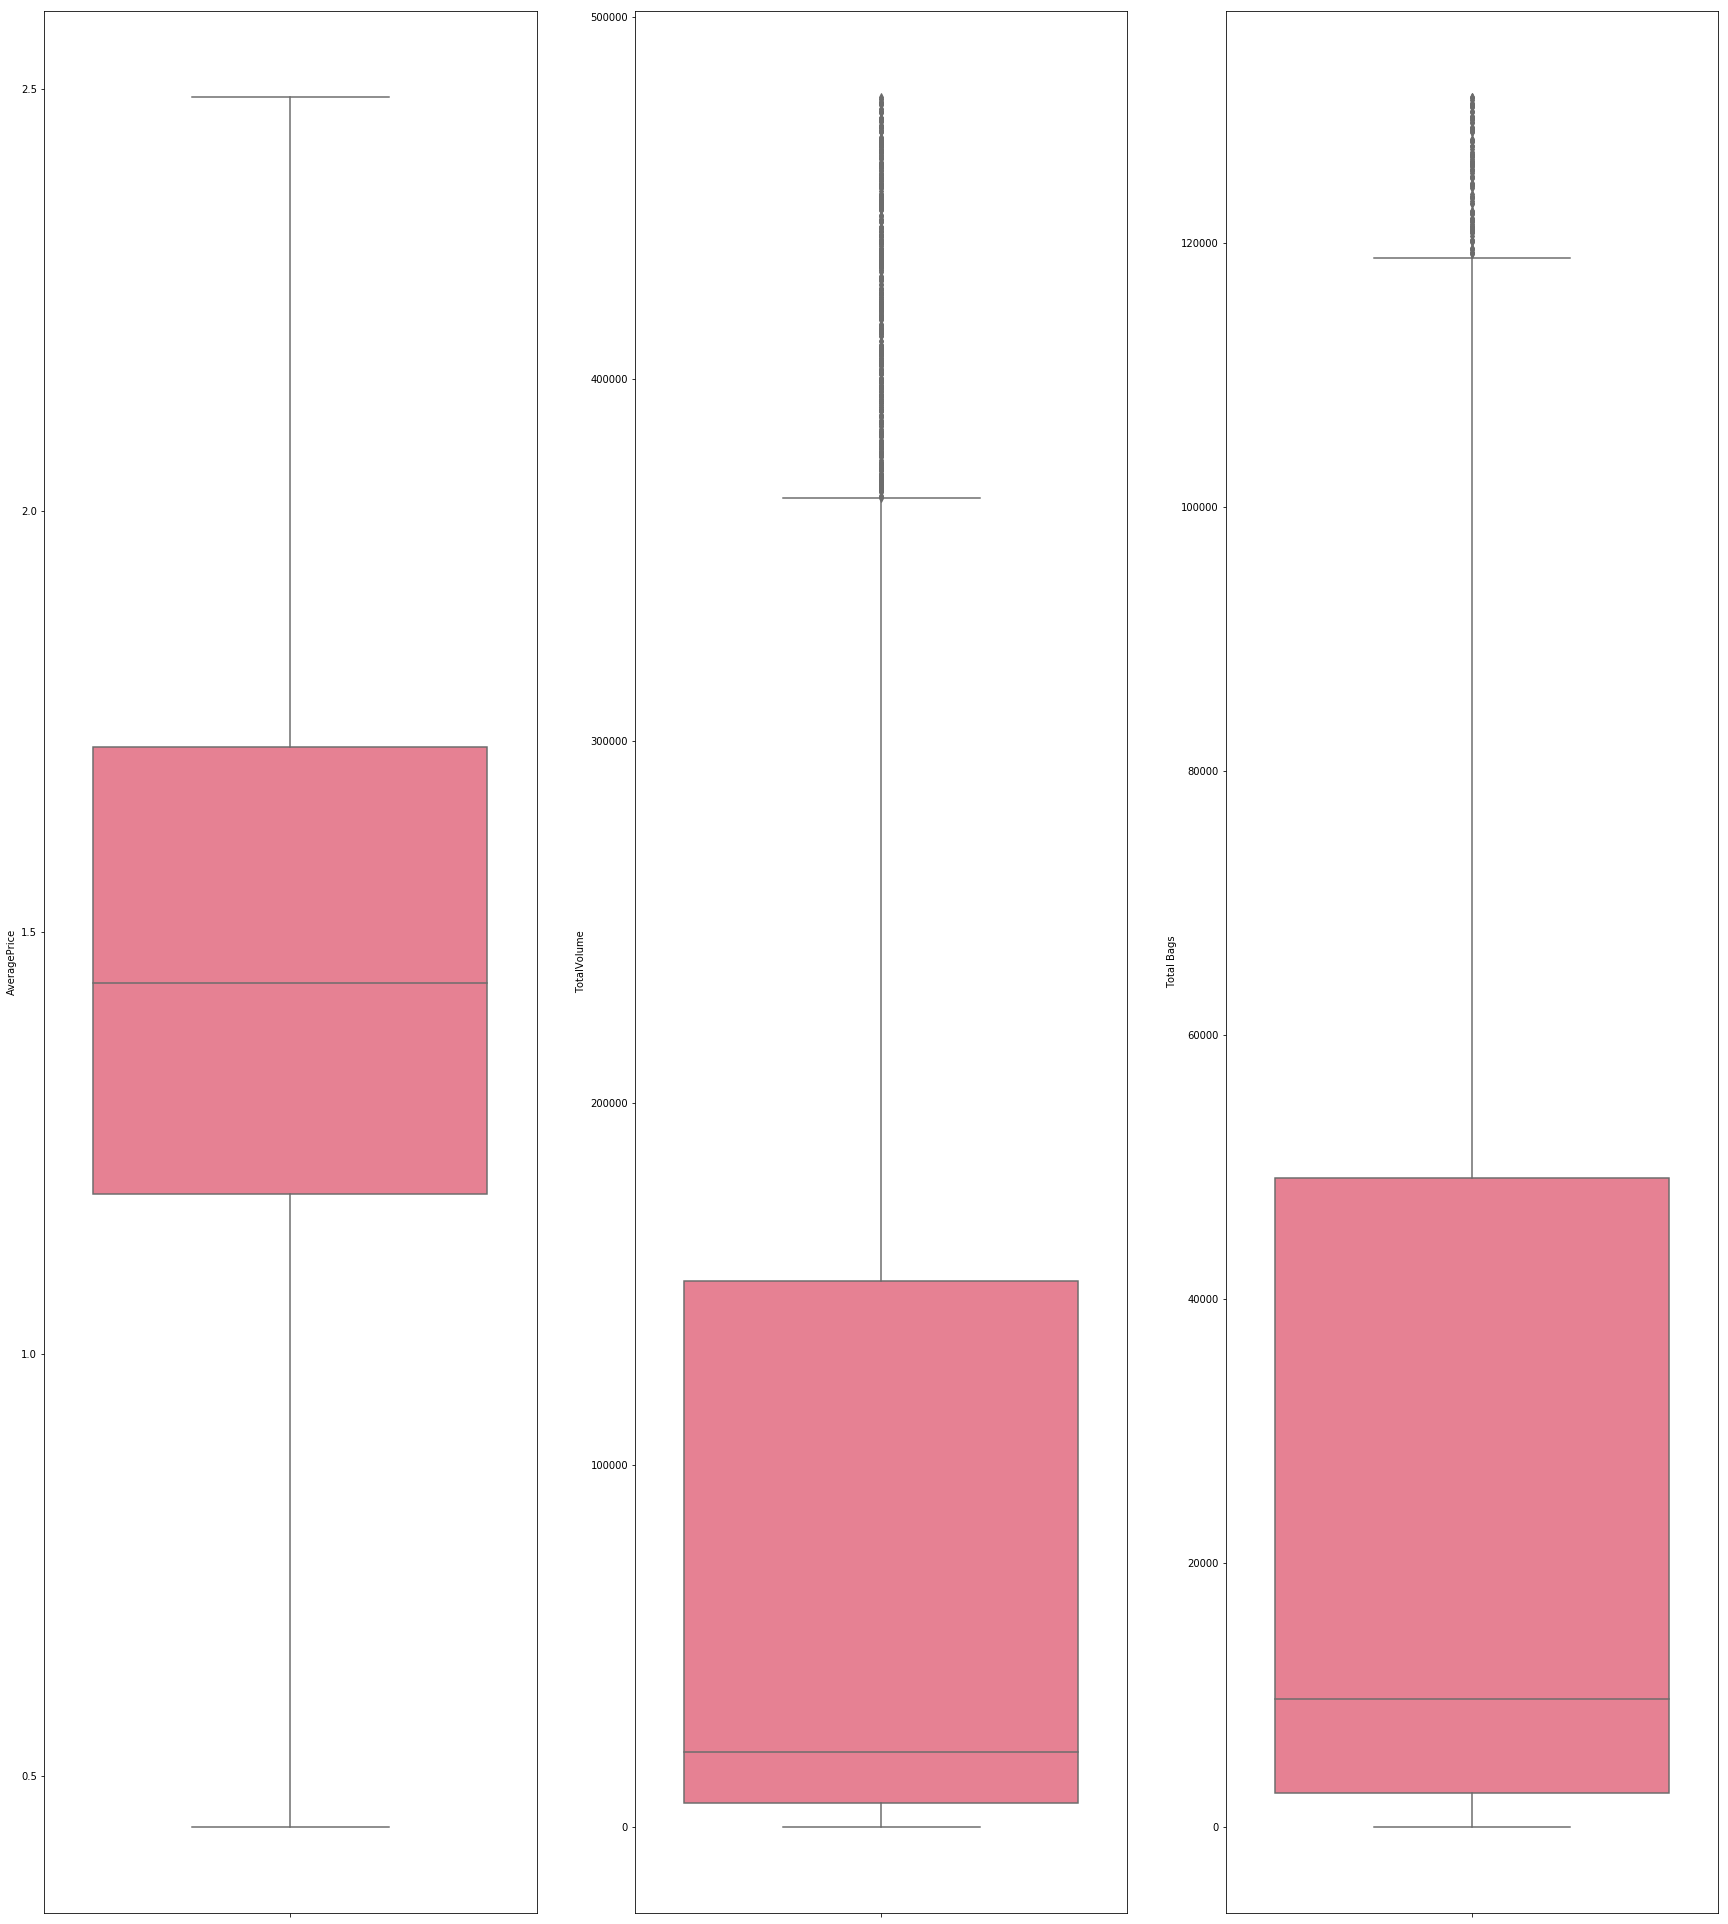

In [16]:
################# Representation of features after removal of the outliers ##################
print("Features considered for box-plot :- ")
fig, axes =plt.subplots(1,3,figsize=(30,35))
for i in range (0,data2.shape[1]-1):
    #fig = plt.figure(figsize = (7, 7))
    print(i+1,".",data2.columns.values[i])
    sns.boxplot(y=str(data2.columns.values[i]),data=data2,ax=axes[i%3],palette = "husl")

### Preliminary Observation :- 

1. We can clearly see the difference in two box plots, the one which we plotted before elimination of the outliers and one after outlier removal.
2. Box plot after removal of all outliers is much better than the previous one and hence our model will be more efficient on this data.
3. To have a more compact data range, we can use the rescaling method of the pre-processing and rescale the data in accordance with min and max value of the respective feature. So the next step will be to rescaling the data and check the effect on boxplots.    
(Source :- https://www.statisticshowto.datasciencecentral.com/normalized/)

In [17]:
print("--------------------- Before Rescaling -----------------------------------")
Temp_df = data2[['AveragePrice','TotalVolume','Total Bags']]

for i in range(len(Temp_df.columns.values)):
    print("Mean of ",Temp_df.columns.values[i],data2[Temp_df.columns.values[i]].mean())

print("---------------------- After Rescaling  -----------------------------------")
#print(data2.head())
for i in range(len(Temp_df.columns.values)):
    data2 = norm(data2,Temp_df.columns.values[i])
    print("Mean of ",Temp_df.columns.values[i],data2[Temp_df.columns.values[i]].mean())


--------------------- Before Rescaling -----------------------------------
Mean of  AveragePrice 1.4671101083032476
Mean of  TotalVolume 89627.82316065031
Mean of  Total Bags 27424.49109386284
---------------------- After Rescaling  -----------------------------------
Mean of  AveragePrice 0.5010293211235365
Mean of  TotalVolume 0.18741088687107338
Mean of  Total Bags 0.20920650101422508


In [18]:
T_Total = data2['type']
X_Total = data2[['AveragePrice','TotalVolume','Total Bags']]
print(X_Total)

       AveragePrice  TotalVolume  Total Bags
15016      0.443902     0.020995    0.074368
15385      0.785366     0.032880    0.085500
1802       0.263415     0.436878    0.404066
2529       0.395122     0.457268    0.454832
16432      0.502439     0.012497    0.041286
9195       0.531707     0.019284    0.026048
13817      0.375610     0.055171    0.161698
3798       0.356098     0.279192    0.452221
10181      0.848780     0.003428    0.004196
9046       0.351220     0.203093    0.384127
4          0.409756     0.106647    0.047174
17424      0.741463     0.010175    0.020164
73         0.346341     0.849354    0.411085
9173       0.678049     0.002394    0.008361
11689      0.570732     0.003177    0.011442
5930       0.439024     0.336632    0.677711
13326      0.429268     0.026655    0.035730
17330      0.321951     0.016633    0.049605
3345       0.307317     0.353028    0.462527
12060      0.751220     0.045101    0.084713
10215      0.673171     0.002760    0.003814
3687      

# III. Methods

In this assignment, you are building a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow (or Keras) codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

![](https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67)



## Importing Required Libraries

In [19]:
import pandas as pd
import operator
import tensorflow as tf
import keras
from keras import models, layers, losses, optimizers, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Embedding
from keras.optimizers import SGD, Adam, RMSprop
from sklearn.preprocessing import *
from sklearn.metrics import *
import matplotlib.patches as mpatches
from keras.layers import LSTM
from keras.preprocessing import sequence
from keras.utils import to_categorical,np_utils

Using TensorFlow backend.


## Train/Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_Total, T_Total, test_size=0.2, random_state=1)
print('X Train Shape',X_train.shape,'X Test Shape',X_test.shape,'T Train Shape',y_train.shape,'T Test Shape',y_test.shape)

X Train Shape (8864, 3) X Test Shape (2216, 3) T Train Shape (8864,) T Test Shape (2216,)


## Starting the timer for the execution of model:-

In [21]:
start = time.time()

## Different neural network structures

## Model 1 :-  Activation Function - ReLU

In [22]:
neurons = [10,15,18,20,22,45,1]
ls = [4,8,16,32,64,128]
temp ={}

model1=keras.models.Sequential()
model1.add(Dense(input_dim=3, units=3,activation='relu'))
for x in range(len(neurons)):
        model1.add(Dense(units=neurons[x], activation='relu'))
#model1=add_activation(model1,neurons,act,ls)
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1_train = model1.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 8864 samples, validate on 2216 samples
Epoch 1/10
8864/8864 [==============================] - 2s 254us/step - loss: 0.3318 - acc: 0.7489 - val_loss: 0.1171 - val_acc: 0.7866
Epoch 2/10
8864/8864 [==============================] - 1s 118us/step - loss: 0.1051 - acc: 0.7516 - val_loss: 0.0885 - val_acc: 0.9368
Epoch 3/10
8864/8864 [==============================] - 1s 125us/step - loss: 0.1175 - acc: 0.7176 - val_loss: 0.0995 - val_acc: 0.6304
Epoch 4/10
8864/8864 [==============================] - 1s 126us/step - loss: 0.0797 - acc: 0.8704 - val_loss: 0.0595 - val_acc: 0.9526
Epoch 5/10
8864/8864 [==============================] - 1s 131us/step - loss: 0.0668 - acc: 0.8837 - val_loss: 0.0485 - val_acc: 0.5749
Epoch 6/10
8864/8864 [==============================] - 1s 128us/step - loss: 0.0618 - acc: 0.7198 - val_loss: 0.0441 - val_acc: 0.5903
Epoch 7/10
8864/

### Explaination Code :-

1. The Sequential model has been implementated. It is a linear stack of layers and a sequantial model can be created by passing a list of layer instances to the constructor.
2. First declared the different neurons that I am going to use for the training.
3. Then created the object of the Sequential class from the keras and created the model named model1 from it.
4. input_dim represents the number of features I am using the training of the model. As I am using only 3 features, it is set to 3.
5. The learning process has been configured using compile() method. 3 arguments have been passed - optimizer, binary_crossentropy and metrics. 
6. Binary_Crosssentropy has been used as I am performing binary classification, optimizer used is 'adam'. I have used 'adam' optimizer as it combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.
7. I am using add method of keras to add() the different hyper paramters in order to create each neural structure.
8. Finally, fit() function has been used for training the model. fit() function trains the model for given number of epochs that is iterations on the dataset.
9. First two parameters are the training input and target data. On the validation data the loss and accuracy is evaluated.
10. For the model1 I am using 'relu' as my activation function.

## Evaluation of the Model1:-

In [23]:
eval1 = model1.evaluate(X_test, y_test, batch_size=32)
temp['relu'] = eval1[1]*100
print('Accuracy is :-',eval1[1]*100,'%')

2216/2216 [==============================] - 0s 47us/step
Accuracy is :- 62.996389891696744 %


## Model 2:-  Activation Function - Tanh

In [24]:
model2=keras.models.Sequential()
model2.add(Dense(input_dim=3, units=3,activation='tanh'))
for x in range(len(neurons)):
        model2.add(Dense(units=neurons[x], activation='tanh'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2_train = model2.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])

Train on 8864 samples, validate on 2216 samples
Epoch 1/10
8864/8864 [==============================] - 2s 269us/step - loss: 0.4214 - acc: 0.7998 - val_loss: 0.2020 - val_acc: 0.7396
Epoch 2/10
8864/8864 [==============================] - 1s 115us/step - loss: 0.1702 - acc: 0.6912 - val_loss: 0.1279 - val_acc: 0.6755
Epoch 3/10
8864/8864 [==============================] - 1s 122us/step - loss: 0.1267 - acc: 0.6533 - val_loss: 0.1003 - val_acc: 0.6449
Epoch 4/10
8864/8864 [==============================] - 1s 123us/step - loss: 0.1811 - acc: 0.6284 - val_loss: 0.0846 - val_acc: 0.6458
Epoch 5/10
8864/8864 [==============================] - 1s 119us/step - loss: 0.2147 - acc: 0.6353 - val_loss: 0.7751 - val_acc: 0.6588
Epoch 6/10
8864/8864 [==============================] - 1s 130us/step - loss: 0.1750 - acc: 0.6591 - val_loss: 0.0634 - val_acc: 0.6561
Epoch 7/10
8864/8864 [==============================] - 1s 131us/step - loss: 0.1299 - acc: 0.6407 - val_loss: 0.1797 - val_acc: 0.6236


### Explaination Code :-

1. The Sequential model has been implementated. It is a linear stack of layers and a sequantial model can be created by passing a list of layer instances to the constructor.
2. First declared the different neurons that I am going to use for the training.
3. Then created the object of the Sequential class from the keras and created the model named model2 from it.
4. input_dim represents the number of features I am using the training of the model. As I am using only 3 features, it is set to 3.
5. The learning process has been configured using compile() method. 3 arguments have been passed - optimizer, binary_crossentropy and metrics. 
6. Binary_Crosssentropy has been used as I am performing binary classification, optimizer used is 'adam'. I have used 'adam' optimizer as it combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.
7. I am using add method of keras to add() the different hyper paramters in order to create each neural structure.
8. Finally, fit() function has been used for training the model. fit() function trains the model for given number of epochs that is iterations on the dataset.
9. First two parameters are the training input and target data. On the validation data the loss and accuracy is evaluated.
10. For the model1 I am using 'tanh' as my activation function.

## Evaluation of the Model2:-

In [25]:
eval2 = model2.evaluate(X_test, y_test, batch_size=32)
temp['tanh'] = eval2[1]*100
print(eval2)

2216/2216 [==============================] - 0s 56us/step
[0.11796458609173552, 0.6362815884476535]


## Model 3 :-  Activation Function - Sigmoid

In [26]:
model3=keras.models.Sequential()
model3.add(Dense(input_dim=3, units=3,activation='sigmoid'))
for x in range(len(neurons)):
        model3.add(Dense(units=neurons[x], activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3_train = model3.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])

Train on 8864 samples, validate on 2216 samples
Epoch 1/10
8864/8864 [==============================] - 2s 271us/step - loss: 0.6689 - acc: 0.6145 - val_loss: 0.6687 - val_acc: 0.6115
Epoch 2/10
8864/8864 [==============================] - 1s 119us/step - loss: 0.6673 - acc: 0.6145 - val_loss: 0.6682 - val_acc: 0.6115
Epoch 3/10
8864/8864 [==============================] - 1s 127us/step - loss: 0.6678 - acc: 0.6145 - val_loss: 0.6676 - val_acc: 0.6115
Epoch 4/10
8864/8864 [==============================] - 1s 132us/step - loss: 0.4851 - acc: 0.7537 - val_loss: 0.1883 - val_acc: 0.9409
Epoch 5/10
8864/8864 [==============================] - 1s 124us/step - loss: 0.1716 - acc: 0.9437 - val_loss: 0.1656 - val_acc: 0.9395
Epoch 6/10
8864/8864 [==============================] - 1s 139us/step - loss: 0.1599 - acc: 0.9471 - val_loss: 0.1551 - val_acc: 0.9436
Epoch 7/10
8864/8864 [==============================] - 1s 146us/step - loss: 0.1511 - acc: 0.9465 - val_loss: 0.1510 - val_acc: 0.9440


### Explaination Code :-

1. The Sequential model has been implementated. It is a linear stack of layers and a sequantial model can be created by passing a list of layer instances to the constructor.
2. First declared the different neurons that I am going to use for the training.
3. Then created the object of the Sequential class from the keras and created the model named model3 from it.
4. input_dim represents the number of features I am using the training of the model. As I am using only 3 features, it is set to 3.
5. The learning process has been configured using compile() method. 3 arguments have been passed - optimizer, binary_crossentropy and metrics. 
6. Binary_Crosssentropy has been used as I am performing binary classification, optimizer used is 'adam'. I have used 'adam' optimizer as it combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.
7. I am using add method of keras to add() the different hyper paramters in order to create each neural structure.
8. Finally, fit() function has been used for training the model. fit() function trains the model for given number of epochs that is iterations on the dataset.
9. First two parameters are the training input and target data. On the validation data the loss and accuracy is evaluated.
10. For the model1 I am using 'sigmoid' as my activation function.

## Evaluation of the Model3:-

In [27]:
eval3 = model3.evaluate(X_test, y_test, batch_size=32)
temp['sigmoid'] = eval3[1]*100
print(eval3)

2216/2216 [==============================] - 0s 58us/step
[0.13324826670682818, 0.9494584837545126]


## Model 4 :-  Activation Function - Softmax

In [28]:
model4=keras.models.Sequential()
model4.add(Dense(input_dim=3, units=3,activation='softmax'))
for x in range(len(neurons)):
        model4.add(Dense(units=neurons[x], activation='softmax'))
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4_train = model4.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])

Train on 8864 samples, validate on 2216 samples
Epoch 1/10
8864/8864 [==============================] - 3s 301us/step - loss: 6.1457 - acc: 0.6145 - val_loss: 6.1942 - val_acc: 0.6115
Epoch 2/10
8864/8864 [==============================] - 1s 124us/step - loss: 6.1457 - acc: 0.6145 - val_loss: 6.1942 - val_acc: 0.6115
Epoch 3/10
8864/8864 [==============================] - 1s 142us/step - loss: 6.1457 - acc: 0.6145 - val_loss: 6.1942 - val_acc: 0.6115
Epoch 4/10
8864/8864 [==============================] - 1s 148us/step - loss: 6.1457 - acc: 0.6145 - val_loss: 6.1942 - val_acc: 0.6115
Epoch 5/10
8864/8864 [==============================] - 1s 154us/step - loss: 6.1457 - acc: 0.6145 - val_loss: 6.1942 - val_acc: 0.6115
Epoch 6/10
8864/8864 [==============================] - 1s 141us/step - loss: 6.1457 - acc: 0.6145 - val_loss: 6.1942 - val_acc: 0.6115
Epoch 7/10
8864/8864 [==============================] - 1s 142us/step - loss: 6.1457 - acc: 0.6145 - val_loss: 6.1942 - val_acc: 0.6115


### Explaination Code :-

1. The Sequential model has been implementated. It is a linear stack of layers and a sequantial model can be created by passing a list of layer instances to the constructor.
2. First declared the different neurons that I am going to use for the training.
3. Then created the object of the Sequential class from the keras and created the model named model4 from it.
4. input_dim represents the number of features I am using the training of the model. As I am using only 3 features, it is set to 3.
5. The learning process has been configured using compile() method. 3 arguments have been passed - optimizer, binary_crossentropy and metrics. 
6. Binary_Crosssentropy has been used as I am performing binary classification, optimizer used is 'adam'. I have used 'adam' optimizer as it combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.
7. I am using add method of keras to add() the different hyper paramters in order to create each neural structure.
8. Finally, fit() function has been used for training the model. fit() function trains the model for given number of epochs that is iterations on the dataset.
9. First two parameters are the training input and target data. On the validation data the loss and accuracy is evaluated.
10. For the model1 I am using 'softmax' as my activation function.

## Evaluation of the Model4:-

In [29]:
eval4 = model4.evaluate(X_test, y_test, batch_size=32)
temp['softmax'] = eval4[1]*100
print(eval4)

2216/2216 [==============================] - 0s 68us/step
[6.194221064502152, 0.6114620938628159]


## Overall Accuracy of all the models:-

In [30]:
print('Overall Accuracies :- ')
for k, v in temp.items():
    label = v
    print (k ,"----->",label)

Overall Accuracies :- 
relu -----> 62.996389891696744
tanh -----> 63.628158844765345
sigmoid -----> 94.94584837545126
softmax -----> 61.14620938628159


## Activation Function with the max accuracy :- 

In [31]:
max_activation = max(temp.items(), key=operator.itemgetter(1))[0]
print(max_activation)

sigmoid


__Now Selecting above mentioned activation function to train on large number of neurons.__

## Explanation of the choice of Structure and reason:-

### Choice Of Structure :- 

Below are the main reasons to choose Keras(Sequencial) for the implementation of neural network:-

- I have used Sequential API of the keras to build neural network model. The sequential API allows to create models layer-by-layer. But the there is a limitation of the sequenatial that it does not allow you to create models that share layers. In my implementation, I am not going to use any share layered architecture and hence I decided to use Sequencial modelling over functional modelling of Keras.


- 'Sequential' API is a linear stack of layers and this model can be created by passing a list of layer instances to the constructor.


- Another reason to choose keras over tensorflow is the flexibility and simplicity of the keras. Keras provides functionalities which simplifies the implementation of the deep learning neural network and at the same time, we can build complex network.


- As we don't want to perform research on any model, instead we just want to implement pre-defined models with different models by changing hyperparamters, I chose to use keras instead of Tensorflow. But if low level changes in the model are needed then Tensorflow provides more robust functionalities.

### First model :-

1. For the implementation of the deep learning , I have used different activation function such as 'relu', 'tanh', 'sigmoid' and 'softmax'. In the first model, I have used 'relu' for the activation. 


2. The advantage of the ReLU is the sparsity. Sparse representation seem to be more beneficial than that of dense representation. As we can have as many layers as we want in case of the ReLu, because multiplying the gradients will neither vanish nor explode.


3. I have used below mentioned neurons while implementing sequential model. I will be using the same values of neurons, while creating the models with different activation function, so that I can have clear idea about which activation function is performing well on my data and with the use of that model I can increase the number of neuron layers and check the effect on accuracy.

    Neurons used :- [10,15,18,20,22,45,1]

### Second model :-

1. In the second model, I have used the 'tanh'. 'tanh' is mainly used because it has stronger gradients and avoids bias with those gradients. I thought it might work well on the my data and hence I chose this activation function to perform the experiment.


2. Although it is similar to the sigmoid function, only difference is that it is shifted case of sigmoid. The range of the tanh is between [-1, 1]. This means that tanh function saturates at +1 and -1.


3. I have kept the nerouns value similar to first model and performance of the activation fucntion is measures. I have used epochs =10 while training the model.It is a measure of the number of times all of the training vectors are used once to update the weights. Hence if the epoch  has very large value then our model may be overfitted and the lesser value of epoch will lead to underfit. Hence selection of right value of epoch plays important role in the training.



### Third Model:-

1. Previously, I implemented tanh on my data, but it didnt perform well hence i choose to implement sigmoid activation function. This is similar to the tanh but only difference is that, range of the signmoid is between [0,1]. 


2. As the distribution of my data is between 0 and 1, i thought sigmoid will perform well on such well distributed data. And hence I choose this activation function even after getting poor results after tanh.


###  Fourth Model:-

1. As if the activity in the network during training is close to zero then the gradient for the sigmoid activation function may go to zero. This is also known as 'vanishing gradient problem', to eliminate this issue I decided to use another activation function and that is 'Softmax Activation Function'.


2. Softmax calculates the exponential term as the activation function. This exponential function will increase the probability of maximum value of the previous layer compare to other value. Hence while predicting the value in the next layer, previous layers value will play important part. Hence I will be using softmax to perform the implementation and will be checking the accuracy after implementation.


3. I am sometimes getting the highest accuracy with the softmax function but most of the time highest accuracy with 'relu' as my activation function. The accuracy is varying as I am performing the sampling from whole data and as a result, distributon of data that I am getting is different everytime.


## Now modelling with the best paramter and with different set of neurons

In [32]:
neurons = [5,12,18,20,100,150,1]
model5=keras.models.Sequential()
model5.add(Dense(input_dim=3, units=3,activation = max_activation))
for x in range(len(neurons)):
        model5.add(Dense(units=neurons[x], activation=max_activation))
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5_train = model5.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])


Train on 8864 samples, validate on 2216 samples
Epoch 1/10
8864/8864 [==============================] - 3s 323us/step - loss: 0.6723 - acc: 0.6093 - val_loss: 0.6686 - val_acc: 0.6115
Epoch 2/10
8864/8864 [==============================] - 1s 150us/step - loss: 0.6702 - acc: 0.6145 - val_loss: 0.6690 - val_acc: 0.6115
Epoch 3/10
8864/8864 [==============================] - 1s 155us/step - loss: 0.6699 - acc: 0.6145 - val_loss: 0.6729 - val_acc: 0.6115
Epoch 4/10
8864/8864 [==============================] - 1s 157us/step - loss: 0.6690 - acc: 0.6145 - val_loss: 0.6654 - val_acc: 0.6115
Epoch 5/10
8864/8864 [==============================] - 1s 153us/step - loss: 0.3119 - acc: 0.8475 - val_loss: 0.1402 - val_acc: 0.9468
Epoch 6/10
8864/8864 [==============================] - 1s 158us/step - loss: 0.1328 - acc: 0.9532 - val_loss: 0.1348 - val_acc: 0.9486
Epoch 7/10
8864/8864 [==============================] - 2s 172us/step - loss: 0.1297 - acc: 0.9548 - val_loss: 0.1350 - val_acc: 0.9499


## Final Evaluation Results :-

In [33]:
eval_final = model5.evaluate(X_test, y_test, batch_size=32)
print("Final Accuracy :- ",eval_final[1]*100,"%")

2216/2216 [==============================] - 0s 57us/step
Final Accuracy :-  95.35198555956678 %


### Explaination of experimental code :-

1. The Sequential model has been implementated. It is a linear stack of layers and a sequantial model can be created by passing a list of layer instances to the constructor.
2. First declared the different neurons that I am going to use for the training.
3. Then created the object of the Sequential class from the keras and created the model from it.
4. input_dim represents the number of features I am using the training of the model. As I am using only 3 features, it is set to 3.
5. The learning process has been configured using compile() method. 3 arguments have been passed - optimizer, binary_crossentropy and metrics. 
6. Binary_Crosssentropy has been used as I am performing binary classification, optimizer used is 'adam'. I have used 'adam' optimizer as it combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.
7. I am using add method of keras to add() the different hyper paramters in order to create each neural structure.
8. Finally, fit() function has been used for training the model. fit() function trains the model for given number of epochs that is iterations on the dataset.
9. First two parameters are the training input and target data. On the validation data the loss and accuracy is evaluated.
10. For the final model I have used the model which is giving maximum accuaracy while trianed ont he same neurons. With this activation function now I have trained the model with high number of neurons.

# IV - Results


## Plots for results:-

In [34]:
def plot_history(history):
    loss = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    accuracy = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    validation_accuracy = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss:
        plt.plot(epochs, history.history[l], 'k', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss:
        plt.plot(epochs, history.history[l], 'c', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in accuracy:
        plt.plot(epochs, history.history[l], 'r', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in validation_accuracy:    
        plt.plot(epochs, history.history[l], 'm', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Plot for the model 1:- 

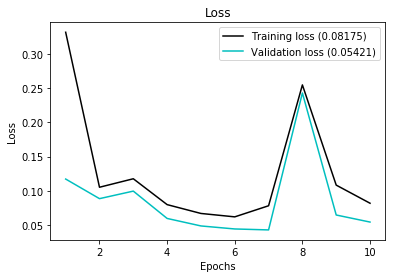

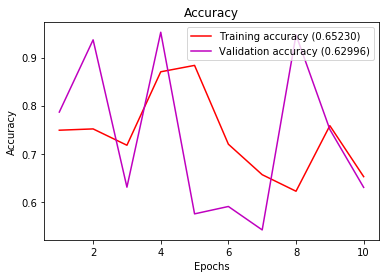

In [35]:
plot_history(model1_train)

## Plot for the model 2:- 

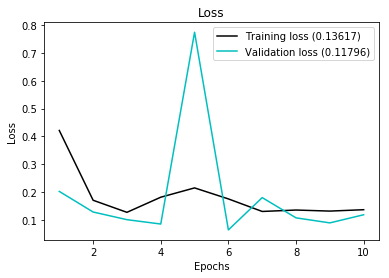

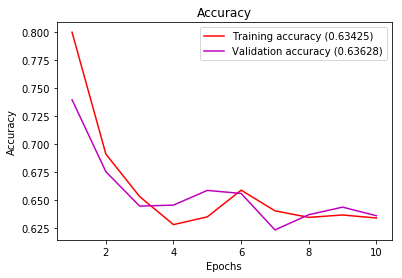

In [36]:
plot_history(model2_train)

## Plot for the model 3:- 

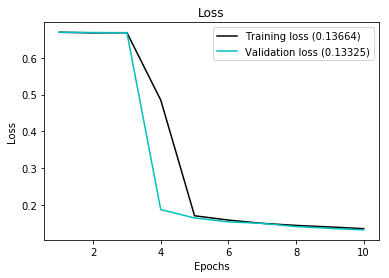

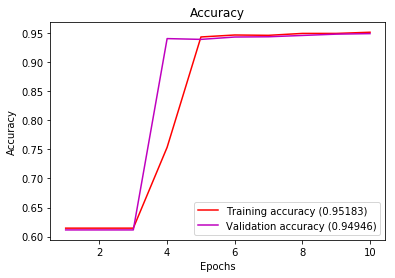

In [37]:
plot_history(model3_train)

## Plot for the model 4:- 

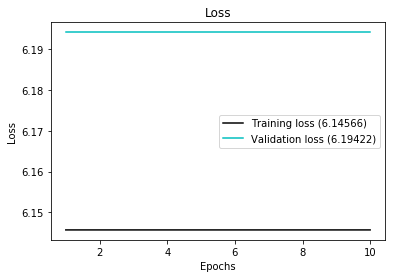

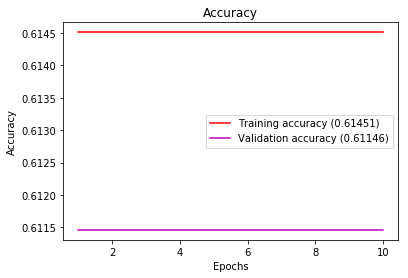

In [38]:
plot_history(model4_train)

## Plot for the Final Model(Model trained with acticvation function having best accuracy):- 

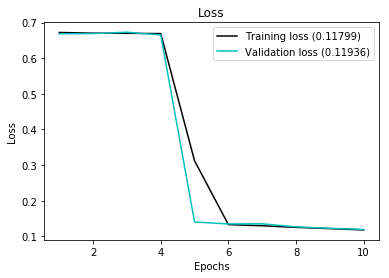

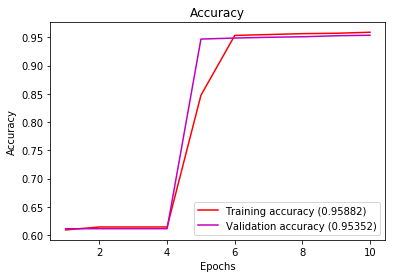

In [39]:
plot_history(model5_train)

## Choice of network structures :-

####  Model 1:

- From the graph it can be ssen that the accuracy of the model 1 is 38.2 % But this is changing with respect to the distributon of the data.
- By the plot of accuracy, it can be concluded that accuracy of model 2 is the least amongst all the models.

#### Model 2:

- Accuracy fo this activation is around 60% an we can see the sharp fall after the some data points. 
- As this is the tanh activation function, this type of fall is expected.


#### Model 3:

- For this model I am using sigmoid activation fucntion, there is a sharp increase in graph.
- The accuracy of this model, converges after a certain number of epochs.
- This model is performing better on my data and hence I have choose this model at the end to train on large number of neurons.

#### Model 4:

- For this model I used softmax function, this function is giving me accuracy around 60%.
- Loss in this model is arounf 6% and hence this particular model is not suitable to use while doing the training on large nunber of neurons.


#### Model 5:
 
 - Here I have used the activation function which is giving better accuracy amongst all and hence the overall accuracy with this model whould be as maximum.
 - From the graph it can be seen that the error with this model is lesser than compared to other models. Hence the approach followed while choosing the best activation function works efficiently on my dataset.

## Ending the Time Period:-

In [40]:
end = time.time()
print("Total time required for the implementation of the model :- ",end - start)

Total time required for the implementation of the model :-  78.87547540664673


# Conclusions

- This assignment helped me to understand different concepts of deep learning and also diferent activation fucntions in more depth.
- Implementation of the algorithms was pretty easy as we have used the keras directly to create the model.
- I always need to restart the kernel before running the notebook so that any previous cache variables will not disturb the overall accuracy.
- I found that the sigmoid actiation function seems to be performing better on my dataset.

### References :-


1. https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/
2. https://stackoverflow.com/questions/45632549/keras-accuracy-for-my-model-always-0-when-training
3. https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
4. https://keras.io/
5. https://www.kaggle.com/danbrice/keras-plot-history-full-report-and-grid-search
6. https://keras.io/getting-started/sequential-model-guide/
7. https://www.quora.com/Artificial-Neural-Networks-Why-do-we-use-softmax-function-for-output-layer

# Extra Credit


## 2. Exra Credit :- 


- I am implementing the code on theJupyter Notebook and CoLab - Google's platform to check the performance of the model on the GPU and on the general genral CPU. 


- It appears that the GPU seems to be performing better - with lesser time. Time required for the implementation of the model with higer number of neurons is lesser on the CoLab as compared to that of on general CPU. 


- Hence whenever we want to develop the model with higer number of neurons, it is better to use GPU for the fast processing.

### Implemenation :-

1. First I uploaded the csv file on git and used the raw URL to import it in the CoLab.


2. I created the new notebook file on the CoLab to run it on the GPU. Once I am done with these two steps, I ran the code on the CoLab as well as on the laptop(general CPU).


3. I have started the timer just before the training of the initial model and ended after execution of all the models.


4. Then calculated the difference between start and end time. This is the total time required for the implementaion of the models.


5. Final results shows that the time required for the GPU is lesser than that on general CPU.

#### Link for the Colab implementation:- 

https://drive.google.com/file/d/1gpDC6blxrC2BmR5vLltnArNjx8KQN14_/edit

### Comparision Table of Time Required:-

| Platform | Time Required (min) - (max)   |
|------|------|
|   Google CoLab  | 33.75 - 40.00|
|   Jupyter Notebook  | 80.15 - 90.942|

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| Includes description of your data
 | 5| Plots to visualize data 
 | 5| Reading and analyzing the plots 
50 | Methods | 
 | 30| Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 
 |   | Relate the choice of your data!
 | 15| Explanation of codes for each structure
 |  5| Explanation of experimental codes
25 | Results | Your Data
| 15| plots for results 
| 10| Discussions about the choice of network structures 
5 | Conclusions 
